In [146]:
#### creiamo delle matrici con le roc area di test e la differenza con le roc area di train

In [147]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle
import matplotlib.colors as mcolors

In [148]:
#### lavoriamo separatamente per le tre geometrie, creiamo una matrice 11x11 per ogni geometria
#### per le geometrie funnel e bottle ci sarà un buco in corrispondenza del modello depth 20 layer 32

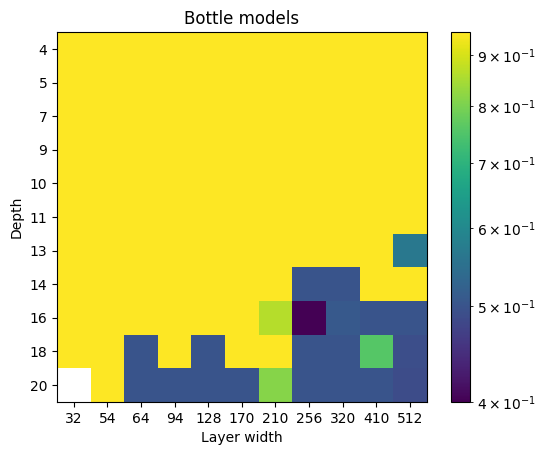

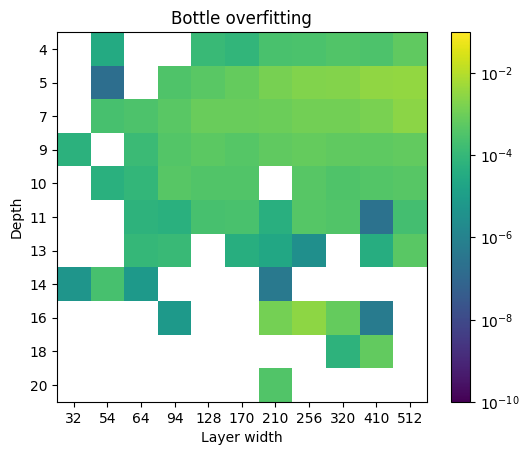

In [149]:
#### partiamo dai modelli bottle
bottle_models_path = '/home/private/Hepd/Dataset_4/fcNN/normalized/bottle/'
depths = [ 4, 5 , 7, 9, 10, 11, 13, 14, 16, 18, 20]
widths = [32, 54, 64, 94, 128, 170, 210, 256, 320, 410, 512]

roc_matrix = np.zeros((11,11))
delta_roc_matrix = np.zeros((11,11))

for i,depth in enumerate(depths):
    for j,width in enumerate(widths):
        if depth == 20 and width == 32:
            roc_matrix[i][j] = 0.5
            delta_roc_matrix[i][j] = 1e-10
        else:
            with open(bottle_models_path+'/bottle_'+'depth_'+str(depth)+'_'+str(width)+'/bottle_'+'depth_'+str(depth)+'_'+str(width)+'_test_ROC_auc.pkl','rb') as f:
                roc_matrix[i][j] = pickle.load(f)
            with open(bottle_models_path+'/bottle_'+'depth_'+str(depth)+'_'+str(width)+'/bottle_'+'depth_'+str(depth)+'_'+str(width)+'_train_ROC_auc.pkl','rb') as f:
                delta_roc_matrix[i][j] = pickle.load(f) - roc_matrix[i][j]

norm = mcolors.LogNorm(vmin = 0.4, vmax = 0.95)

roc_matrix[10][0] = np.nan

plt.imshow(roc_matrix, norm=norm, cmap='viridis')
plt.xticks(ticks=np.arange(11), labels=[f'{i}' for i in widths])
plt.yticks(ticks=np.arange(11), labels=[f'{i}' for i in depths])
cbar = plt.colorbar()
plt.title('Bottle models')
plt.ylabel('Depth')
plt.xlabel('Layer width')
plt.savefig('/home/private/Hepd/Dataset_4/models_evaluation/NN/fcNN/bottle_rocs_area.png')
plt.show()

norm = mcolors.LogNorm(vmin=1e-10, vmax=1e-1)

delta_roc_matrix[10][0] = np.nan

plt.imshow(delta_roc_matrix, norm=norm, cmap='viridis')
plt.colorbar()
plt.xticks(ticks=np.arange(11), labels=[f'{i}' for i in widths])
plt.yticks(ticks=np.arange(11), labels=[f'{i}' for i in depths])
plt.title('Bottle overfitting')
plt.ylabel('Depth')
plt.xlabel('Layer width')
plt.savefig('/home/private/Hepd/Dataset_4/models_evaluation/NN/fcNN/bottle_delta_rocs_area.png')
plt.show()

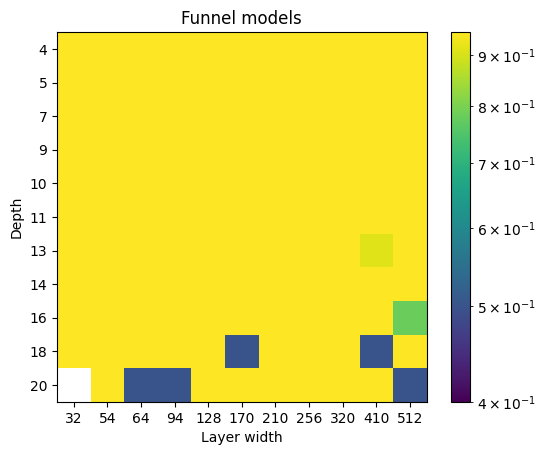

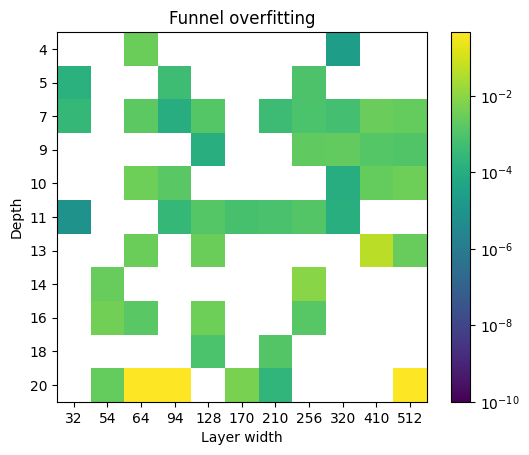

In [150]:
####  modelli funnel
funnel_models_path = '/home/private/Hepd/Dataset_4/fcNN/normalized/funnel/'
depths = [ 4, 5 , 7, 9, 10, 11, 13, 14, 16, 18, 20]
widths = [32, 54, 64, 94, 128, 170, 210, 256, 320, 410, 512]

roc_matrix = np.zeros((11,11))
delta_roc_matrix = np.zeros((11,11))

for i,depth in enumerate(depths):
    for j,width in enumerate(widths):
        if depth == 20 and width == 32:
            roc_matrix[i][j] = 0.5
            delta_roc_matrix[i][j] = 1e-10
        else:
            with open(funnel_models_path+'/funnel_'+'depth_'+str(depth)+'_'+str(width)+'/funnel_'+'depth_'+str(depth)+'_'+str(width)+'_test_ROC_auc.pkl','rb') as f:
                roc_matrix[i][j] = pickle.load(f)
            with open(funnel_models_path+'/funnel_'+'depth_'+str(depth)+'_'+str(width)+'/funnel_'+'depth_'+str(depth)+'_'+str(width)+'_train_ROC_auc.pkl','rb') as f:
                delta_roc_matrix[i][j] = pickle.load(f) - roc_matrix[i][j]


norm = mcolors.LogNorm(vmin = 0.4, vmax = 0.95)

roc_matrix[10][0] = np.nan

plt.imshow(roc_matrix, norm=norm, cmap='viridis')
plt.colorbar()
plt.xticks(ticks=np.arange(11), labels=[f'{i}' for i in widths])
plt.yticks(ticks=np.arange(11), labels=[f'{i}' for i in depths])
plt.title('Funnel models')
plt.ylabel('Depth')
plt.xlabel('Layer width')
plt.savefig('/home/private/Hepd/Dataset_4/models_evaluation/NN/fcNN/funnel_rocs_area.png')
plt.show()

norm = mcolors.LogNorm(vmin=1e-10, vmax=delta_roc_matrix.max())

delta_roc_matrix[10][0] = np.nan


plt.imshow(delta_roc_matrix, norm=norm, cmap='viridis')
plt.colorbar()
plt.xticks(ticks=np.arange(11), labels=[f'{i}' for i in widths])
plt.yticks(ticks=np.arange(11), labels=[f'{i}' for i in depths])
plt.title('Funnel overfitting')
plt.ylabel('Depth')
plt.xlabel('Layer width')
plt.savefig('/home/private/Hepd/Dataset_4/models_evaluation/NN/fcNN/funnel_delta_rocs_area.png')
plt.show()

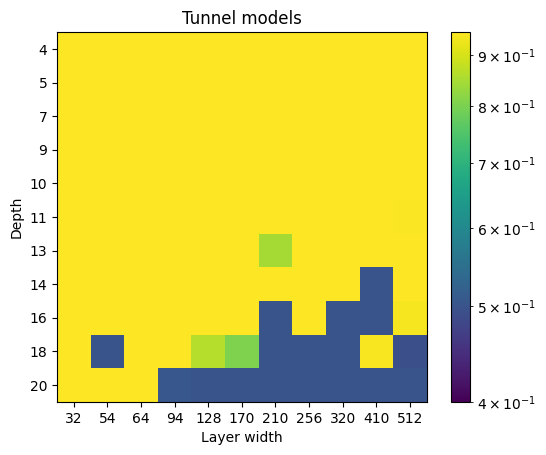

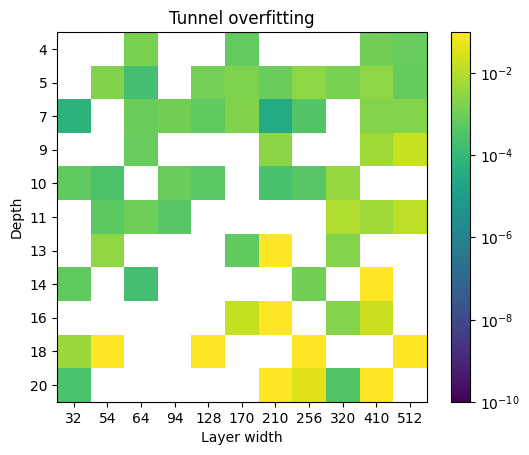

In [151]:
####  modelli tunnel
constant_models_path = '/home/private/Hepd/Dataset_4/fcNN/normalized/constant/'
depths = [ 4, 5 , 7, 9, 10, 11, 13, 14, 16, 18, 20]
widths = [32, 54, 64, 94, 128, 170, 210, 256, 320, 410, 512]

roc_matrix = np.zeros((11,11))
delta_roc_matrix = np.zeros((11,11))

for i,depth in enumerate(depths):
    for j,width in enumerate(widths):
        with open(constant_models_path+'/constant_'+'depth_'+str(depth)+'_'+str(width)+'/constant_'+'depth_'+str(depth)+'_'+str(width)+'_test_ROC_auc.pkl','rb') as f:
            roc_matrix[i][j] = pickle.load(f)
        with open(constant_models_path+'/constant_'+'depth_'+str(depth)+'_'+str(width)+'/constant_'+'depth_'+str(depth)+'_'+str(width)+'_train_ROC_auc.pkl','rb') as f:
            delta_roc_matrix[i][j] = pickle.load(f) - roc_matrix[i][j]


norm = mcolors.LogNorm(vmin = 0.4, vmax = 0.95)

plt.imshow(roc_matrix, norm=norm, cmap='viridis')
plt.colorbar()
plt.xticks(ticks=np.arange(11), labels=[f'{i}' for i in widths])
plt.yticks(ticks=np.arange(11), labels=[f'{i}' for i in depths])
plt.title('Tunnel models')
plt.ylabel('Depth')
plt.xlabel('Layer width')
plt.savefig('/home/private/Hepd/Dataset_4/models_evaluation/NN/fcNN/constant_rocs_area.png')
plt.show()

norm = mcolors.LogNorm(vmin = 1e-10, vmax=1e-1)

plt.imshow(delta_roc_matrix, norm=norm, cmap='viridis')
plt.colorbar()
plt.xticks(ticks=np.arange(11), labels=[f'{i}' for i in widths])
plt.yticks(ticks=np.arange(11), labels=[f'{i}' for i in depths])
plt.title('Tunnel overfitting')
plt.ylabel('Depth')
plt.xlabel('Layer width')
plt.savefig('/home/private/Hepd/Dataset_4/models_evaluation/NN/fcNN/constant_delta_rocs_area.png')
plt.show()